<a href="https://colab.research.google.com/github/gapself/machine-learning/blob/main/image-recognition-projects/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* GPU (Runtime / Change runtime type) !!!

## MNIST



### Wczytanie i wizualizacja

* Wczytuję dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [ ]:
print('instancje treningowe: ' + str(X_train.shape[0]))
print('instancje testowe:  ' + str(X_test.shape[0]))
print('wymiary w pixelach jednego obrazka:  ' + str(X_train[0].shape) + ' px')
print('liczba kanałów jednego obrazka:  1 (Ponieważ wszystkie obrazy są w skali szarości, liczba kanałów wynosi 1.')
print('ile bajtów zajmuje jeden piksel:   1 bajt na pixel ')
print('minimalna wartość piksela:  '+ str(X_train.min()))
print('maxymalna wartość piksela:  ' + str(X_train.max()))

instancje treningowe: 60000
instancje testowe:  10000
wymiary w pixelach jednego obrazka:  (28, 28) px
liczba kanałów jednego obrazka:  1 (Ponieważ wszystkie obrazy są w skali szarości, liczba kanałów wynosi 1.
ile bajtów zajmuje jeden piksel:   1 bajt na pixel 
minimalna wartość piksela:  0
maxymalna wartość piksela:  255


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

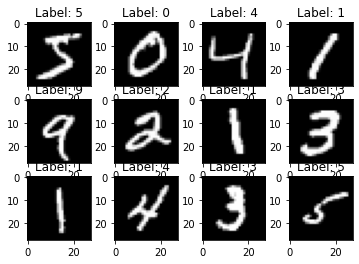

In [ ]:
import matplotlib.pyplot as plt

for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title('Label: {}'.format(y_train[i]))
plt.show()

* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

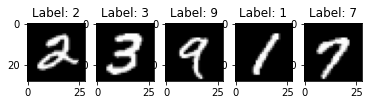

In [ ]:
import matplotlib.pyplot as plt
labels = [2,3,9,1,7]
import numpy as np

for id,x in enumerate(labels):
  result = np.where(y_train == x)
  index_for_num = result[0][0]
  plt.subplot(1, 5, id+1)
  plt.imshow(X_train[index_for_num], cmap='gray')
  plt.title('Label: {}'.format(y_train[index_for_num]))
plt.show()


5
AxesImage(54,36;334.8x217.44)


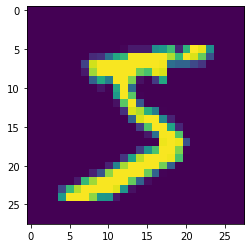

In [ ]:
print(y_train[0])
print(plt.imshow(X_train[0]))

### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>


Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train) #wektor macierzy a nie wektor liczby
Y_test = np_utils.to_categorical(y_test)

In [ ]:
print("10 pierwszych elementów Y_train \n", Y_train[0:10], "\n")
print("10 pierwszych elementów Y_test \n", Y_test[0:10], "\n")
print("zapis etykiet dla cyfr: 1, 2 i 4:")
lista = [1,2,4]
for el in lista:
  for x in y_train:
    if y_train[x] == el:
      print("Etykieta dla {}".format(el), Y_train[x])
      break

print("zapis etykiet dla indeksu: 23917")
indeks = "23917"
for el in indeks:
  for x in y_train:
    if y_train[x] == int(el):
      print("Etykieta dla {}".format(el), Y_train[x])
      break
    else:
      print("Etykieta dla {}".format(el), Y_train[x])
      break

10 pierwszych elementów Y_train 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

10 pierwszych elementów Y_test 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 

zapis etykiet dla cyfr: 1, 2 i 4:
Etykieta dla 1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Etykieta dla 2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etykieta dla 4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
zapis etykiet dla indeksu: 23917
Etykieta dla 2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etykieta dla

Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

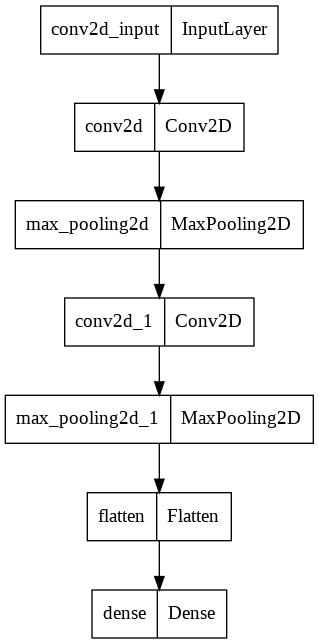

In [ ]:
import keras
import tensorflow as tf 
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

Gdy dodam padding do warstw konwolucyjnych sieci, 
to ich wymiary wyjściowe wyniosą: <br>
przykładowo dla pierwszej warstwy: (None, 28, 28, 16) <br><br>
Natomiast jeśli usunę padding, to wymiary wyjściowe ulegną  zmianie:<br>
dla pierwszej warstwy: (None, 26, 26, 16), 2)<br><br>

Oznacza to, że padding z wartością "SAME" sprawi, że rozmiar wyjściowy będzie taki sam jak wejściowy. Użycie "SAME" zapewnia, że ​​filtr zostanie zastosowany do wszystkich elementów danych wejściowych.

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:


<br><br>
Czy warstwa Conv2D się uczy w trakcie treningu?<br>
odp: tak<br>
Konwolucyjne sieci neuronowe stosują filtr na danych wejściowych, aby utworzyć mapę cech, która wydobywa cechy obrazu na wejściu; operacja polega na pomnożeniu zbioru wag przez dane wejściowe, podobnie jak w przypadku tradycyjnej sieci neuronowej
<br><br>
Czy warstwa MaxPooling2D się uczy w trakcie treningu?:<br>
odp: nie<br>
Operacja polega m.in. na modyfikacji rozmiaru danych-obrazu sieci na mniejszy co ma wpływ na zwiększenie liczby cech, które sieć musi następnie wytrenować.
<br><br>
Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?<br>
Warstwa Flatten jest używana, gdy otrzymujemy wielowymiarowy wynik i chcemy, aby był liniowy, aby następnie przekazać go do warstwy gęstej Dense. 
<br><br>
Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?<br>
odp:
<br><br>

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 14s 6ms/step - loss: 0.4822 - accuracy: 0.8684
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1107 - accuracy: 0.9678
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0755 - accuracy: 0.9779
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.9812
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9840
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0470 - accuracy: 0.9859
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0421 - accuracy: 0.9871
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0384 - accuracy: 0.9886
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0325 - accur

#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [ ]:
results_test = model.evaluate(X_test, Y_test)
results_test[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9896


0.9896000027656555

In [ ]:
results_train = model.evaluate(X_train, Y_train)
results_train[1]

1875/1875 [==============================] - 5s 3ms/step - loss: 8.7837e-05 - accuracy: 1.0000


1.0

Dokładność (accuracy / tutaj: results) na danych testowych jest nieco mniejsza niż dokładność danych treningowych. Ta różnica oznacza przesadne dopasowanie. Overfitting - gdy model uczenia działa gorzej na nowych, wcześniej niewidocznych danych wejściowych (test) niż na danych szkoleniowych (train). "Przesadnie dopasowany model „zapamiętuje” szum i szczegóły w uczącym zestawie danych do punktu, w którym negatywnie wpływa na wydajność modelu na nowych danych."

## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


* Wyświetl 12 pierwszych instancji treningowych

In [ ]:
X_train[:12]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   7,   0,   0

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_train = np_utils.to_categorical(y_train) #wektor macierzy a nie wektor liczby
Y_test = np_utils.to_categorical(y_test)

In [ ]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.7136 - accuracy: 0.7559
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4193 - accuracy: 0.8517
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3727 - accuracy: 0.8697
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3458 - accuracy: 0.8800
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3237 - accuracy: 0.8869
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3099 - accuracy: 0.8910
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2964 - accuracy: 0.8964
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2885 - accuracy: 0.8974
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2768 - accuracy: 0.9025
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2707 - accura

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [ ]:
results_test = model.evaluate(X_test, Y_test)
results_test[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.9088


0.9088000059127808

In [ ]:
results_train = model.evaluate(X_train, Y_train)
results_train[1]

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9662


0.9661666750907898

### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

In [ ]:
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='loss', mode='min', patience=5)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.7440 - accuracy: 0.7522 - val_loss: 0.4728 - val_accuracy: 0.8293
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4258 - accuracy: 0.8499 - val_loss: 0.3884 - val_accuracy: 0.8593
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3705 - accuracy: 0.8702 - val_loss: 0.3628 - val_accuracy: 0.8695
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3442 - accuracy: 0.8787 - val_loss: 0.3369 - val_accuracy: 0.8793
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3218 - accuracy: 0.8868 - val_loss: 0.3224 - val_accuracy: 0.8823
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3088 - accuracy: 0.8910 - val_loss: 0.3092 - val_accuracy: 0.8892
Epoch 7/100
211/211 [==============================] - 1s 6ms/step - loss: 0.2920 - accuracy: 0.8971 - val_loss: 0.3061 - val_accuracy: 0.8915

z val_loss

In [ ]:
model = Sequential([
  Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), #zbieramy obszary 2x2 i konwertujemy je na pojedynczy px
  Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)), #robiąc 2 razy MaxPooling = 2x pomniejszamy obrazek
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem (atrybutów) = zamiast px mamy dane tabelkowe
  Dense(10, activation='softmax')
])

In [ ]:
monitor = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 2s 7ms/step - loss: 0.7476 - accuracy: 0.7424 - val_loss: 0.4667 - val_accuracy: 0.8343
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4245 - accuracy: 0.8493 - val_loss: 0.3994 - val_accuracy: 0.8603
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3748 - accuracy: 0.8671 - val_loss: 0.3659 - val_accuracy: 0.8725
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.3479 - accuracy: 0.8774 - val_loss: 0.3445 - val_accuracy: 0.8782
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3242 - accuracy: 0.8861 - val_loss: 0.3245 - val_accuracy: 0.8863
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.3095 - accuracy: 0.8915 - val_loss: 0.3188 - val_accuracy: 0.8855
Epoch 7/100
211/211 [==============================] - 1s 6ms/step - loss: 0.2971 - accuracy: 0.8948 - val_loss: 0.3004 - val_accuracy: 0.8912

val_loss to wartość funkcji kosztu dla danych z walidacji krzyżowej, a loss to wartość funkcji kosztu dla danych treningowych. w przypadku val_loss: wynik accuracy jest o 0.04 lepszy.

### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

## model 1

In [ ]:
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  BatchNormalization(),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),

  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  BatchNormalization(),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),

  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.15),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 5s 17ms/step - loss: 0.4994 - accuracy: 0.8220 - val_loss: 3.0567 - val_accuracy: 0.1873
Epoch 2/100
211/211 [==============================] - 3s 14ms/step - loss: 0.3045 - accuracy: 0.8908 - val_loss: 1.6847 - val_accuracy: 0.5070
Epoch 3/100
211/211 [==============================] - 3s 14ms/step - loss: 0.2549 - accuracy: 0.9083 - val_loss: 0.3572 - val_accuracy: 0.8705
Epoch 4/100
211/211 [==============================] - 3s 14ms/step - loss: 0.2281 - accuracy: 0.9173 - val_loss: 0.2467 - val_accuracy: 0.9103
Epoch 5/100
211/211 [==============================] - 3s 14ms/step - loss: 0.2043 - accuracy: 0.9255 - val_loss: 0.2803 - val_accuracy: 0.9005
Epoch 6/100
211/211 [==============================] - 3s 14ms/step - loss: 0.1862 - accuracy: 0.9322 - val_loss: 0.2357 - val_accuracy: 0.9147
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 0.1703 - accuracy: 0.9373 - val_loss: 0.2515 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, Y_test)
print(scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.9151
0.9150999784469604


## model 2

In [ ]:
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.5),
  Flatten(),  # this converts our 3D feature maps to 1D feature vectors
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 2s 7ms/step - loss: 0.7606 - accuracy: 0.7230 - val_loss: 0.4981 - val_accuracy: 0.8102
Epoch 2/20
211/211 [==============================] - 1s 6ms/step - loss: 0.4965 - accuracy: 0.8179 - val_loss: 0.4083 - val_accuracy: 0.8502
Epoch 3/20
211/211 [==============================] - 1s 6ms/step - loss: 0.4371 - accuracy: 0.8426 - val_loss: 0.3687 - val_accuracy: 0.8690
Epoch 4/20
211/211 [==============================] - 1s 7ms/step - loss: 0.4016 - accuracy: 0.8539 - val_loss: 0.3364 - val_accuracy: 0.8788
Epoch 5/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3757 - accuracy: 0.8645 - val_loss: 0.3212 - val_accuracy: 0.8842
Epoch 6/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3597 - accuracy: 0.8688 - val_loss: 0.3079 - val_accuracy: 0.8872
Epoch 7/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3405 - accuracy: 0.8766 - val_loss: 0.2955 - val_accuracy: 0.8927
Epoch 

In [ ]:
scores = model.evaluate(X_test, Y_test)
print(scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9021
0.9021000266075134


## model 3

In [ ]:
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.5),
  Flatten(),  # this converts our 3D feature maps to 1D feature vectors
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=256, callbacks=[monitor], validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 2s 8ms/step - loss: 0.7582 - accuracy: 0.7291 - val_loss: 0.4680 - val_accuracy: 0.8330
Epoch 2/20
211/211 [==============================] - 2s 8ms/step - loss: 0.4780 - accuracy: 0.8267 - val_loss: 0.3969 - val_accuracy: 0.8553
Epoch 3/20
211/211 [==============================] - 1s 6ms/step - loss: 0.4247 - accuracy: 0.8471 - val_loss: 0.3768 - val_accuracy: 0.8640
Epoch 4/20
211/211 [==============================] - 2s 7ms/step - loss: 0.3951 - accuracy: 0.8567 - val_loss: 0.3586 - val_accuracy: 0.8693
Epoch 5/20
211/211 [==============================] - 1s 7ms/step - loss: 0.3708 - accuracy: 0.8647 - val_loss: 0.3267 - val_accuracy: 0.8790
Epoch 6/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3575 - accuracy: 0.8696 - val_loss: 0.3069 - val_accuracy: 0.8893
Epoch 7/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3373 - accuracy: 0.8778 - val_loss: 0.2955 - val_accuracy: 0.8917
Epoch 

In [ ]:
scores = model.evaluate(X_test, Y_test)
print(scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2553 - accuracy: 0.9086
0.9085999727249146
